In [20]:
# import random forest regressor
from sklearn.ensemble import RandomForestRegressor
# import train_test_split function
from sklearn.model_selection import train_test_split
# import metrics to evaluate model performance
from sklearn import metrics
# import numpy
import numpy as np
# import pandas
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns

In [21]:
df = pd.read_csv('full_labeled_dataset.csv')
df.drop('lat', axis=1, inplace=True)
df.drop('lng', axis=1, inplace=True)
df.drop('Country', axis=1, inplace=True)
df

,EPI,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,77.9,38.162162,0.486486,36.135135,0.486486,28.459459,16.892606,420.574573,-0.018400,58.532004,60.380934,23.881716
1,76.5,39.468750,1.109375,31.093750,2.015625,23.218750,13.062585,390.502406,0.071515,39.819921,52.447294,24.268743
2,75.2,49.500000,1.000000,48.500000,0.833333,35.833333,12.928818,358.605720,0.199930,53.765492,55.288936,25.956258
3,72.7,36.891304,0.652174,35.043478,0.326087,23.369565,14.575789,408.231117,0.101320,30.538042,61.464471,21.090349
4,72.3,26.000000,1.000000,26.000000,2.000000,23.000000,11.934365,396.584723,0.054288,38.776574,46.629358,28.252348
...,...,...,...,...,...,...,...,...,...,...,...,...
140,24.8,24.733333,0.000000,15.933333,0.066667,19.733333,12.892059,392.660349,-0.124678,52.326236,45.514262,24.853516
141,24.6,184.200000,2.333333,92.971429,2.400000,178.771429,15.065736,385.861747,0.219654,51.503348,65.831495,28.965631
142,23.1,98.909091,2.090909,45.545455,2.272727,97.000000,15.659164,394.515873,0.068599,27.048098,46.292734,12.394761
143,19.4,36.625000,0.425000,21.950000,0.225000,34.950000,15.468154,423.911381,-0.074438,50.765979,51.269755,17.367162


Epoch 1/10000
4/4 [==============================] - 1s 56ms/step - loss: 1918.8927 - val_loss: 2126.4155
Epoch 2/10000
4/4 [==============================] - 0s 20ms/step - loss: 1907.0209 - val_loss: 2113.8198
Epoch 3/10000
4/4 [==============================] - 0s 19ms/step - loss: 1895.6962 - val_loss: 2101.3606
Epoch 4/10000
4/4 [==============================] - 0s 18ms/step - loss: 1884.2953 - val_loss: 2088.8811
Epoch 5/10000
4/4 [==============================] - 0s 18ms/step - loss: 1872.8970 - val_loss: 2075.9851
Epoch 6/10000
4/4 [==============================] - 0s 17ms/step - loss: 1861.0720 - val_loss: 2062.9883
Epoch 7/10000
4/4 [==============================] - 0s 19ms/step - loss: 1848.8987 - val_loss: 2049.7434
Epoch 8/10000
4/4 [==============================] - 0s 18ms/step - loss: 1836.5170 - val_loss: 2036.1013
Epoch 9/10000
4/4 [==============================] - 0s 20ms/step - loss: 1823.8790 - val_loss: 2021.6271
Epoch 10/10000
4/4 [==========================

/var/folders/72/z1rg7v4n0tqckznknymhcd9w0000gn/T/ipykernel_13635/1565683783.py:63: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50)


<Axes: xlabel='Y Test', ylabel='Predicted Y'>

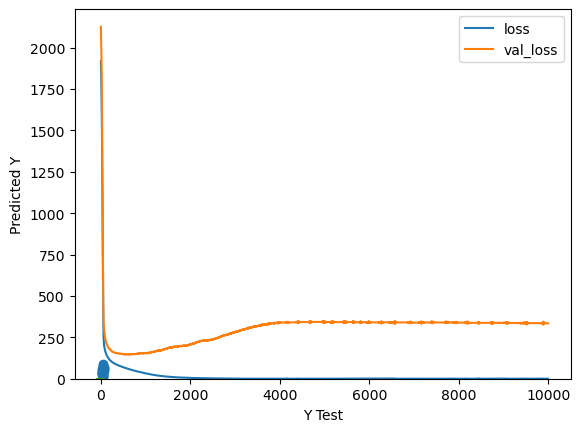

In [26]:
# Create a neural network that predicts the environmental sustainability using the features in the full_labeled_dtataset.csv dataset
# Write necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

# we already have the df dataframe from the previous cell
# we already dropped the country column

# Create a list of all the column headers except for the target column
X = df.drop('EPI',axis=1).values
y = df['EPI'].values

# Use train_test_split to create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the model
model = Sequential()

# Add layers to the model
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Fit the model to the training data
model.fit(x=X_train,
            y=y_train,
            epochs=10000,
            validation_data=(X_test, y_test), verbose=1
            )

# Plot the loss
losses = pd.DataFrame(model.history.history)
losses.plot()

# Evaluate the model
predictions = model.predict(X_test)
print(mean_absolute_error(y_test,predictions))
print(np.sqrt(mean_squared_error(y_test,predictions)))
print(explained_variance_score(y_test,predictions))

# Create a scatterplot of the real test values versus the predicted values
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Create a histogram of the residuals
sns.distplot((y_test-predictions),bins=50)

In [35]:
model.predict(np.array([50,3,20,10,12,30,3,900,0.7,10]).astype('float32'))

ValueError: in user code:

    File "/Users/masudip/anaconda3/envs/DeepNet/lib/python3.9/site-packages/keras/src/engine/training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "/Users/masudip/anaconda3/envs/DeepNet/lib/python3.9/site-packages/keras/src/engine/training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/masudip/anaconda3/envs/DeepNet/lib/python3.9/site-packages/keras/src/engine/training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/masudip/anaconda3/envs/DeepNet/lib/python3.9/site-packages/keras/src/engine/training.py", line 2283, in predict_step
        return self(x, training=False)
    File "/Users/masudip/anaconda3/envs/DeepNet/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).
    
    Cannot iterate over a shape with unknown rank.
    
    Call arguments received by layer 'sequential_1' (type Sequential):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • training=False
      • mask=None
